# **Анализ датасета и предварительная обработка**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/muradpo/andan_project/main/dataset_to_work_on.csv', sep=',')
df = df.iloc[:,2:]
df

,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
0,3000,Собственник,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,Кизилюртовская
1,2000,Собственник,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,2500,Собственник,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,Ленина
3,1400,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,Приморская
4,3500,Собственник,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,ВременаГода
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2999,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,Советская
1095,2500,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,МаксимаГорького
1096,2700,Собственник,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,Гусаева
1097,1500,Собственник,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,Ленина


**Итог**: будем работать в итоге с датафреймом размером **1099*20**.


Основные признаки, на которые мы ориентируемся:

*   цена
*   общая площадь
*   жилая площадь
*   этаж



0 в столбце "агентство" - квартира сдается от лица собственника или нет

0 в столбце "жилая площадь"- арендодатели не указали информацию - не будем ничем заполнять, так как замена на среднюю/медиану может оказаться тем, что метраж жилой площади будет больше, чем общая площадь квартиры

0 в столбце "дети" - можно ли в квартире селиться с детьми


Находим самые часто встречающиеся улицы.

Дальше будем использовать их для построения графиков и проверки гипотез.


In [ ]:
streets=(df.iloc[:,-1:].value_counts()).to_frame().iloc[1:,:]
streets.columns=['count']
all_streets = streets
streets = streets[streets['count']>15].reset_index(drop=False) #Оставили улицы, на которых количество квартир больше 15
streets

,улица,count
0,Ленина,79
1,просп.Акулиничева,36
2,просп.РасулаГамзатова,33
3,Кавказская,28
4,Лаптиева,26
5,МаксимаГорького,21
6,АбдулхакимаИсмаилова,20
7,Молодежная,20
8,Даниялова,19
9,ВременаГода,18


Находим самые часто встречающиеся районы.

Дальше будем использовать их для построения графиков и проверки гипотез.


In [ ]:
districts=(df['район'].value_counts()).to_frame().reset_index(drop=False)
districts.columns=['район','count']
districts =districts[districts.район != '0']
districts

,район,count
0,Ленинский,424
2,Советский,213
3,Кировский,93
4,Кемпинг микро,1


In [ ]:
#нашли для цены эти значения - будем ориентироваться на них при формулировке гипотез
print(df.цена.mean())
print(df.цена.median())
print(df.цена.mode())
print(df.цена.var())
print(df.цена.std())
print(df.цена.quantile(0.99))

2619.9417652411285
2500.0
0    2500
Name: цена, dtype: int64
1043644.808991781
1021.5893543845203
6000.0


In [ ]:
#теперь для общей площади квартиры
print(df['общая площадь'].mean())
print(df['общая площадь'].median())
print(df['общая площадь'].mode())
print(df['общая площадь'].var())
print(df['общая площадь'].std())
print(df['общая площадь'].quantile(0.99))

56.90673339399454
52.0
0    50.0
Name: общая площадь, dtype: float64
360.42377975672537
18.984830253566276
120.0


# **Визуализация**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


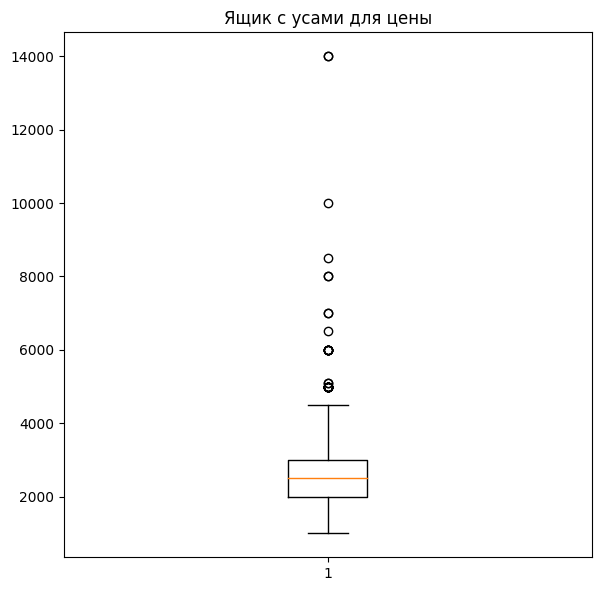

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.title("Ящик с усами для цены")
plt.boxplot(df.цена);

По ящику с усами видно, что в данных есть значительные выбросы. Например, цена равная 14000. По ценам квартир мы дальше будем создавать признак и ранжировать по категориям.


Медиана цен находится на уровне ~2600 рублей.

Изначально мы оставили выброс в 14000 (так как до этого уже удаляли цену в 35к), так как все равно должно быть более-менее элитное жилье в выборке. Доделав проект до конца, а точнее часть с мо, решили все-таки его удалить - итоговые метрики получаются лучше :)
Так что датасет уменьшается на две строчку.

In [ ]:
df=df[df['цена'] != 14000]
df

,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
0,3000,Собственник,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,Кизилюртовская
1,2000,Собственник,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,2500,Собственник,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,Ленина
3,1400,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,Приморская
4,3500,Собственник,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,ВременаГода
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2999,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,Советская
1095,2500,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,МаксимаГорького
1096,2700,Собственник,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,Гусаева
1097,1500,Собственник,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,Ленина


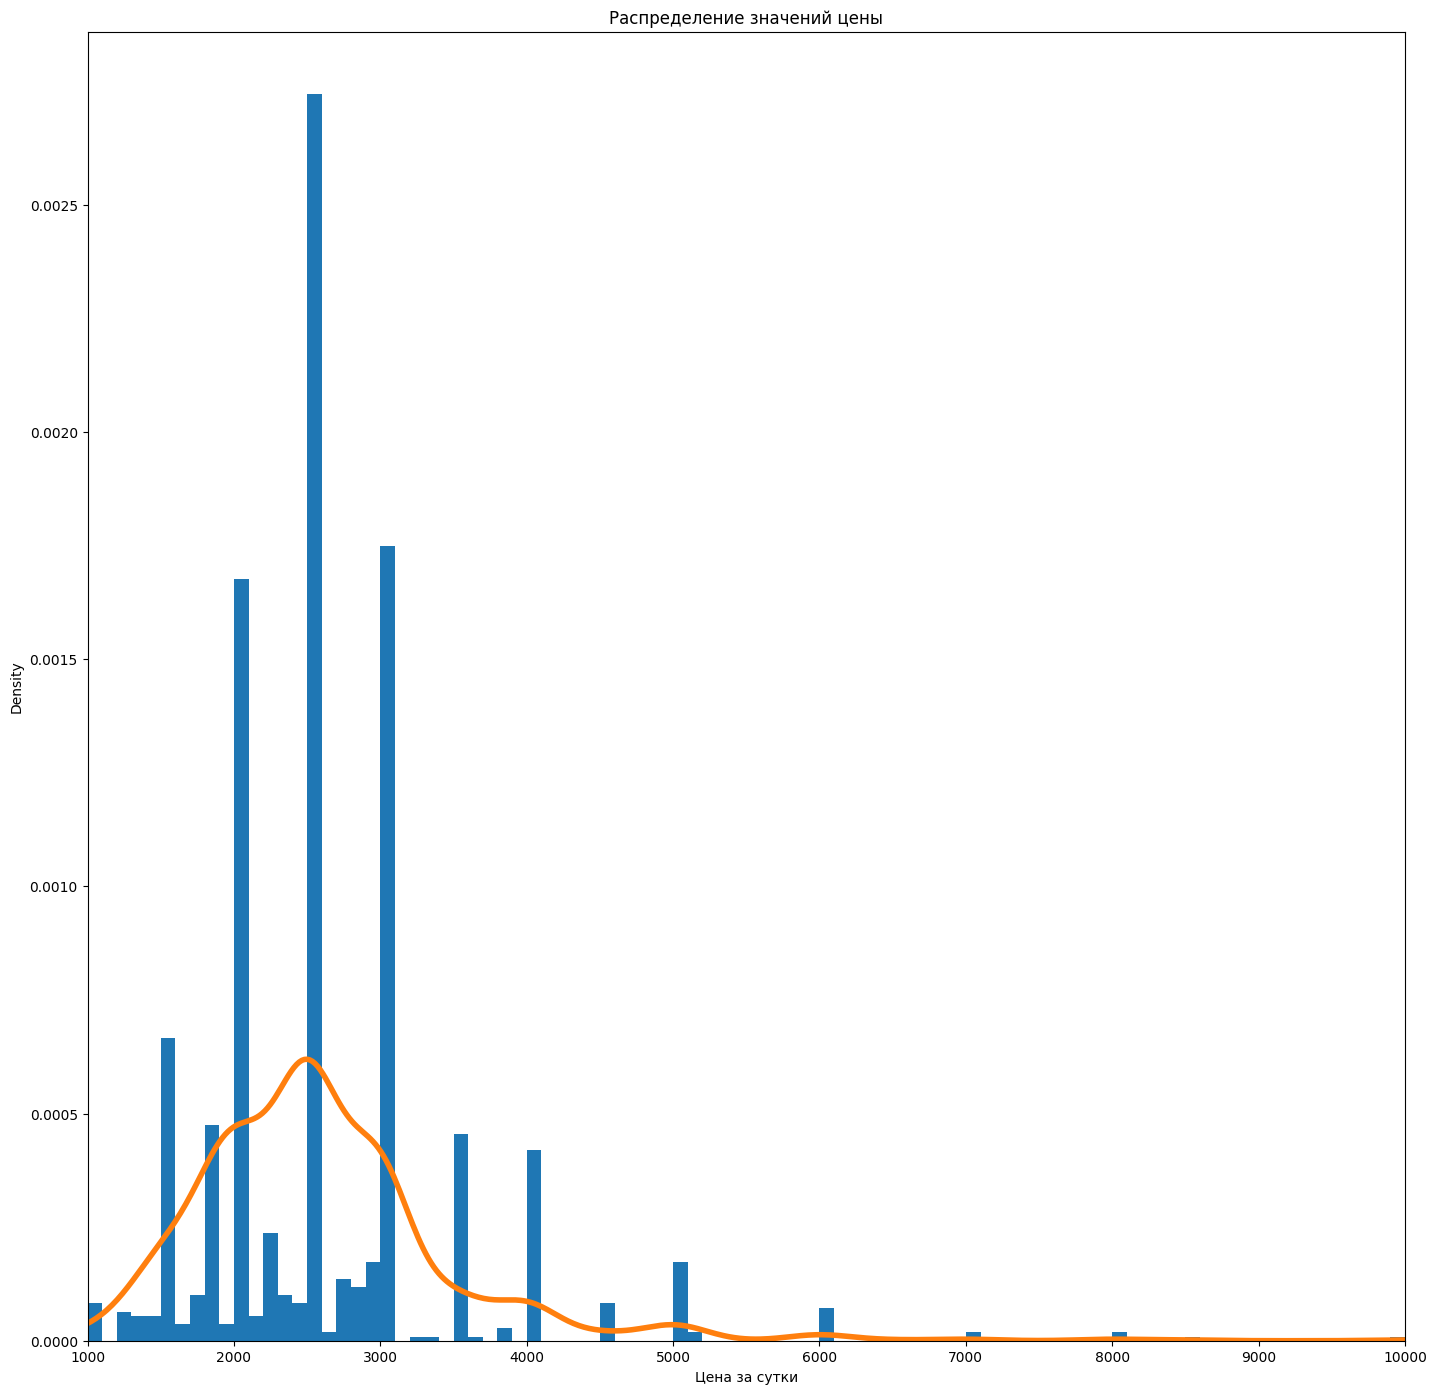

In [ ]:
plt.figure(figsize = (17,17))
df.цена.hist(bins=90,density = True);
df.цена.plot(kind='kde', linewidth=4)
plt.xlim(1000, 10000)
plt.xlabel("Цена за сутки")
plt.title("Распределение значений цены");

Есть выбросы. Цены почти всех квартир распределены в отрезке от 1000 до 6000 рублей. Есть несколько мод. Самое частое значение цены: 2600-2800. Минимальное значение цены: 1000. Максимальное: 10000.

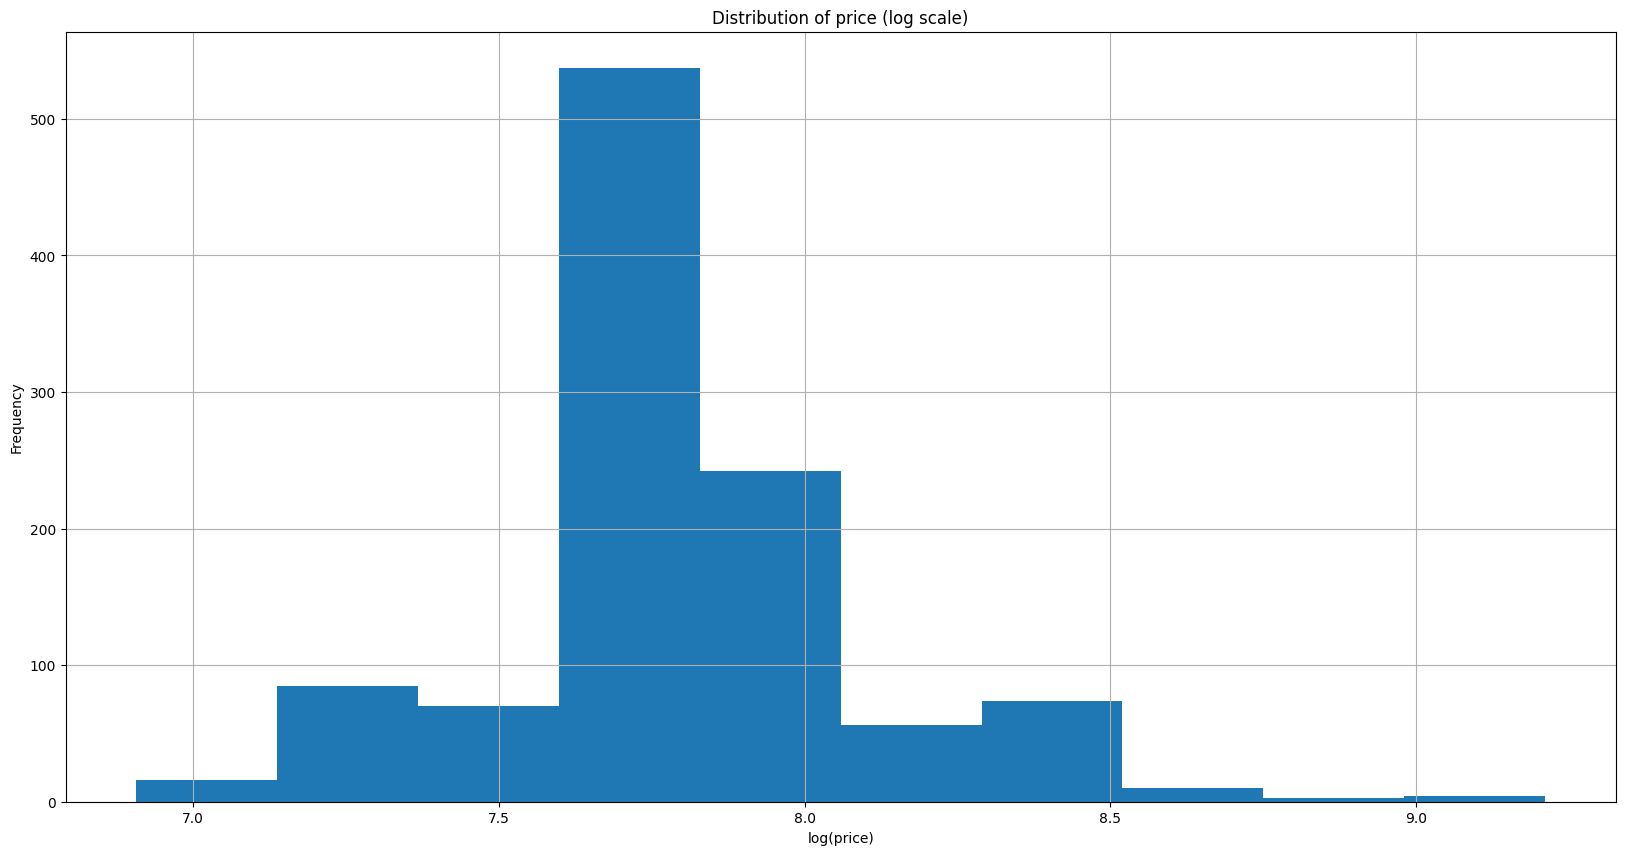

In [ ]:
#логарифмируем значения цен - чтобы выбросы сгладились
prices = df.цена.apply(lambda x: np.log(x ))
df.цена.apply(lambda x: np.log(x )).hist(figsize=(20, 10));
plt.xlabel("log(price)")
plt.ylabel('Frequency')
plt.title("Distribution of price (log scale)");

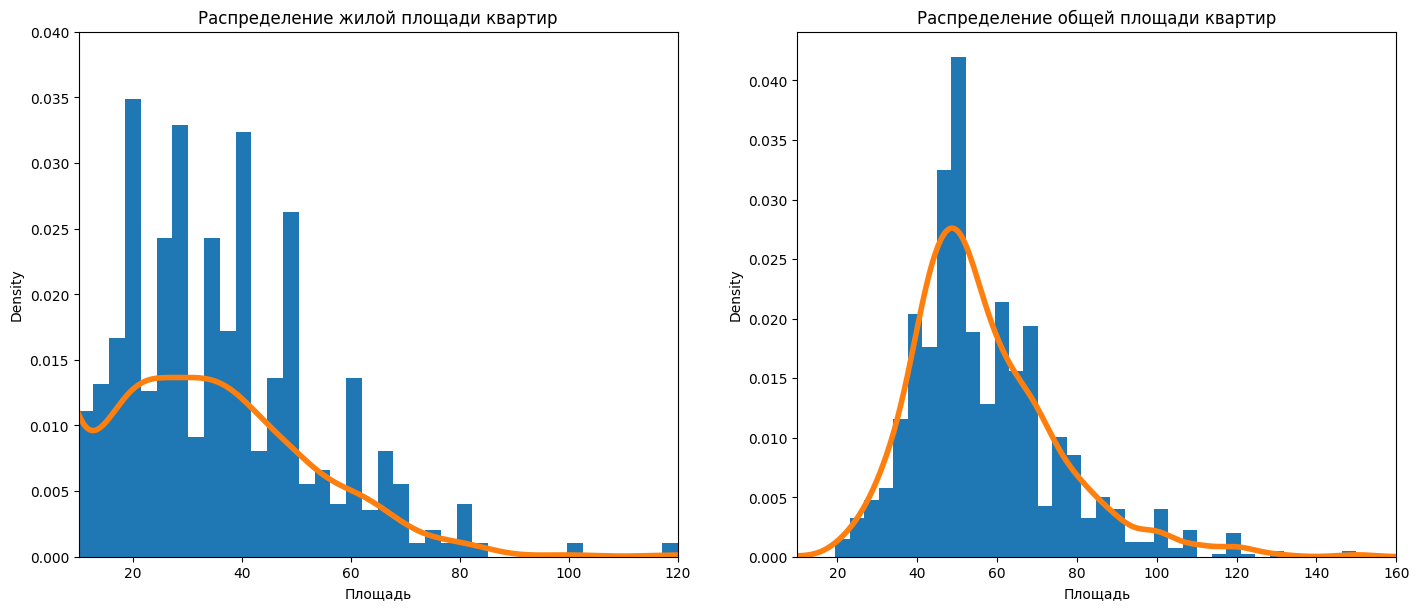

In [ ]:
plt.figure(figsize = (17,15))
plt.subplot(2, 2, 1)
df[df['жилая площадь']!=0]['жилая площадь'].hist(bins=40, density=True) #распределение жилой площади квартир, у которых есть эта инфа на сайтах
df['жилая площадь'].plot(kind='kde', linewidth=4)
plt.xlim(10, 120)
plt.ylim(0,0.04)
plt.xlabel("Площадь")
plt.title("Распределение жилой площади квартир")
plt.subplot(2, 2, 2)
df['общая площадь'].hist(bins=40, density=True)
df['общая площадь'].plot(kind='kde', linewidth=4)
plt.xlim(10, 160)
plt.xlabel("Площадь")
plt.title("Распределение общей площади квартир");

Наиболее часто встречающийся метраж жилой площади - 20 кв. м

Наиболее часто встречающийся метраж общей площади - 50 кв. м
Несколько мод на первом графике. Мода на втором% 48-52 кв метра. Есть выбросы и слева и справа. Максимальное значение жилой площади 120 кв метров.

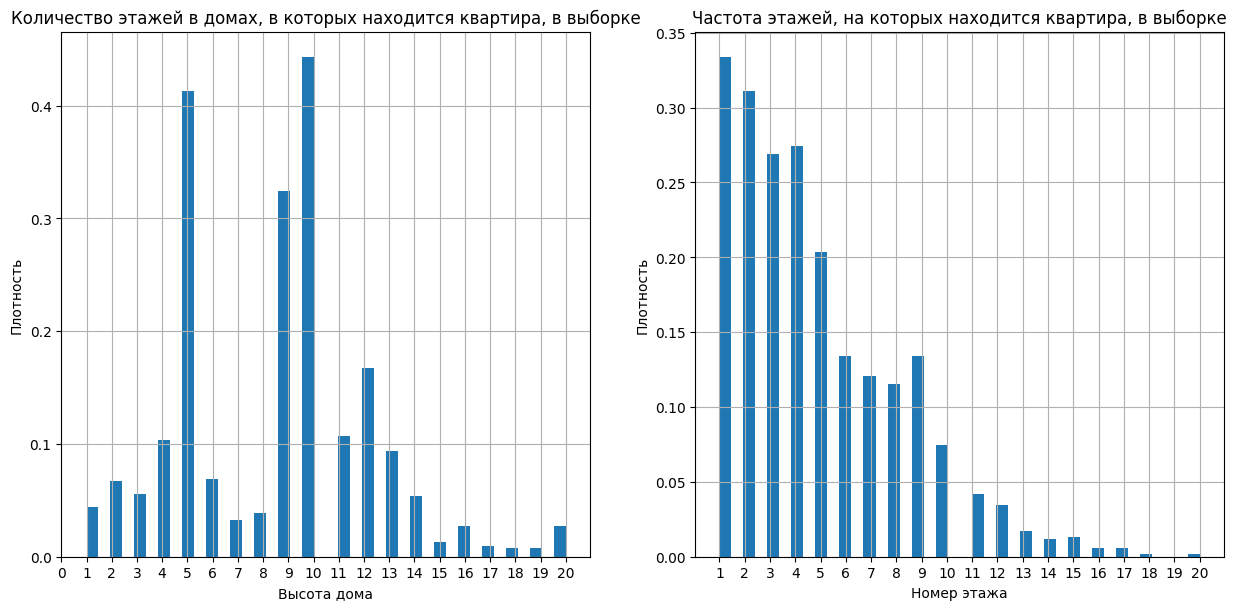

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.xlabel("Высота дома")
plt.ylabel("Плотность")
plt.title("Количество этажей в домах, в которых находится квартира, в выборке")
df['всего этажей'].hist(bins=40, density=True)
plt.xticks(range(21))
plt.subplot(2, 2, 2)
plt.xlabel("Номер этажа")
plt.title("Частота этажей, на которых находится квартира, в выборке")
plt.ylabel("Плотность")
plt.xticks(range(21))
df["этаж"].hist(bins=40, density=True);


Наиболее часто квартиры сдаются на 1-2 этажах. С увеличением этажа частота снижается.
Наиболее часто встречающаяся этажность - 5, 9, 10 этажей в доме.

Найдем корреляции между признаками.

In [ ]:
colnames = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.values
(df[colnames].corr(method='pearson'))


,цена,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна
цена,1.000000,0.445796,0.088444,0.168580,0.228689,0.054994,-0.007595,0.150447,0.090997,-0.027256,-0.017125,0.107874,0.127758,0.180570,0.087657,-0.027389
общая площадь,0.445796,1.000000,0.305615,0.094123,0.194261,0.102273,-0.019025,0.033212,0.096541,-0.010499,-0.075479,0.071416,0.086670,0.093950,-0.073681,0.077346
жилая площадь,0.088444,0.305615,1.000000,-0.025879,-0.035129,0.042298,0.037292,-0.062400,0.064771,0.018634,0.068299,0.010551,0.017010,0.051247,-0.066504,0.061597
этаж,0.168580,0.094123,-0.025879,1.000000,0.615625,0.024003,-0.020985,0.020730,-0.049104,-0.032603,0.009728,0.020459,0.039277,0.048047,0.011613,0.012202
всего этажей,0.228689,0.194261,-0.035129,0.615625,1.000000,-0.013546,0.014631,-0.005455,0.028665,0.000109,0.031757,0.040477,0.064453,0.065131,-0.025574,0.056250
Дети,0.054994,0.102273,0.042298,0.024003,-0.013546,1.000000,0.136273,0.041794,0.083547,0.145744,0.126270,0.076721,0.084752,0.060048,-0.017660,0.116987
холодильник,-0.007595,-0.019025,0.037292,-0.020985,0.014631,0.136273,1.000000,-0.025322,0.411638,0.648947,0.660659,0.228937,0.183747,0.178236,-0.003355,0.153394
посудомойка,0.150447,0.033212,-0.062400,0.020730,-0.005455,0.041794,-0.025322,1.000000,0.042256,0.024466,-0.004476,0.074514,0.068288,0.081552,0.079168,-0.008313
стиральная машина,0.090997,0.096541,0.064771,-0.049104,0.028665,0.083547,0.411638,0.042256,1.000000,0.376399,0.310888,0.252260,0.197735,0.244605,0.042166,0.152717
мебель в комнатах,-0.027256,-0.010499,0.018634,-0.032603,0.000109,0.145744,0.648947,0.024466,0.376399,1.000000,0.461107,0.159832,0.121304,0.152019,0.011805,0.110262


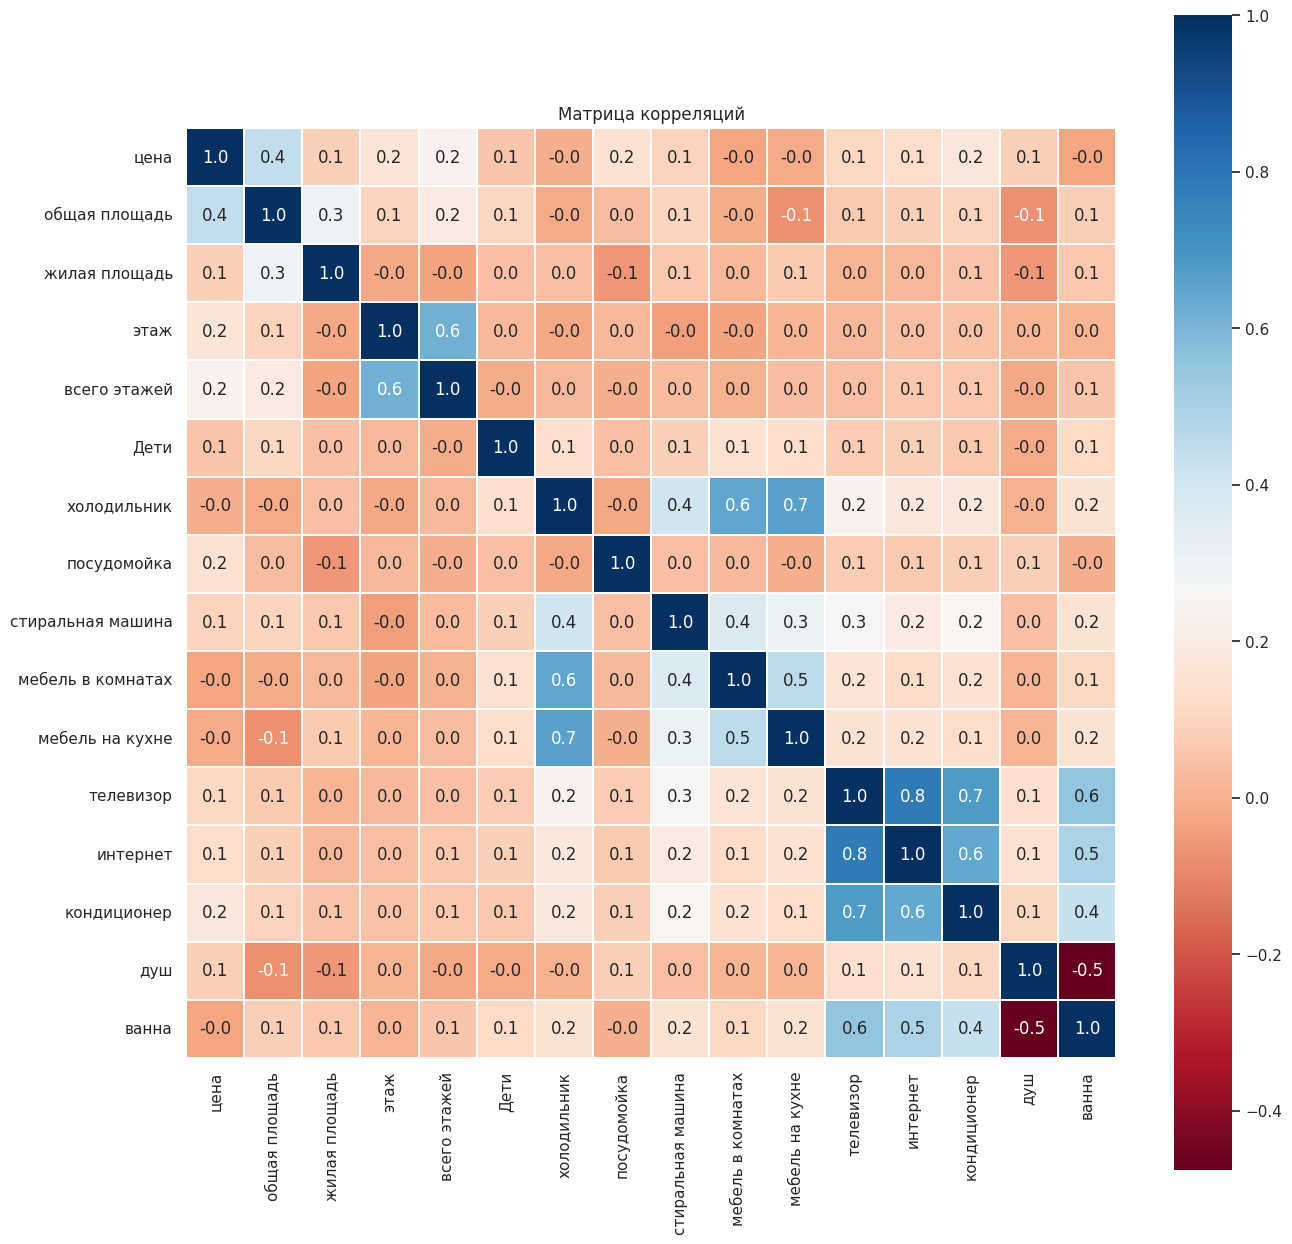

In [ ]:
plt.figure(figsize = (15,15))
plt.title('Матрица корреляций')
sns.heatmap(df[colnames].corr(method='pearson'),
            square=True, annot=True, fmt=".1f",
            linewidths=0.1, cmap="RdBu");

Наибольшая корреляция наблюдается между:
- интернетом и телевизором (0.8);
- телевизором и кондиционером (0.7);
- холодильником и мебелью на кухне (0.7)

Некоторые результаты интуитивно понятны (например, холодильник и кухонная мебель), связь между телевизором и кондиционером не так очевидна (однако телевизор есть в подавляющем числе квартир (952) и весьма вероятно они стоят в гостиных, куда хозяева и устанавливают кондиционеры для удобства гостей).

Душ и ванная взаимоисключающие пункты, поэтому корреляция отрицательная - практически всегда, если в квартире есть ванна, дополнительно не устанавливают еще и душ, и наоборот.

Есть признаки, которые не коррелируют в целом ни с чем - например, признак "дети", что логично, так как остальные признаки касались характеристик квартиры.

Значения коэффициента корреляции говорят о силе линейной связи. Мы не можем сделать выводы о причинно-следственной связи, основываясь только на нем.

Смотрим внимательнее, в скольких квартирах есть следующее:

In [ ]:
df.душ.value_counts()

0    940
1    157
Name: душ, dtype: int64

In [ ]:
df.ванна.value_counts()

1    829
0    268
Name: ванна, dtype: int64

In [ ]:
df.телевизор.value_counts()

1    950
0    147
Name: телевизор, dtype: int64

In [ ]:
df.кондиционер.value_counts()

1    880
0    217
Name: кондиционер, dtype: int64

Самая очевидная зависимость: зависимость цены от общей площади квартиры. Диаграммы ниже позволяют увидеть зависимость между этими столбцами, объединяя диаграмму рассеивания и гистограмму. Снова видим, что большая часть квартир сдается в диапазоне от 2000 до 4000 рублей за сутки. А средняя жилая площадь таких квартир - 50 кв метров.

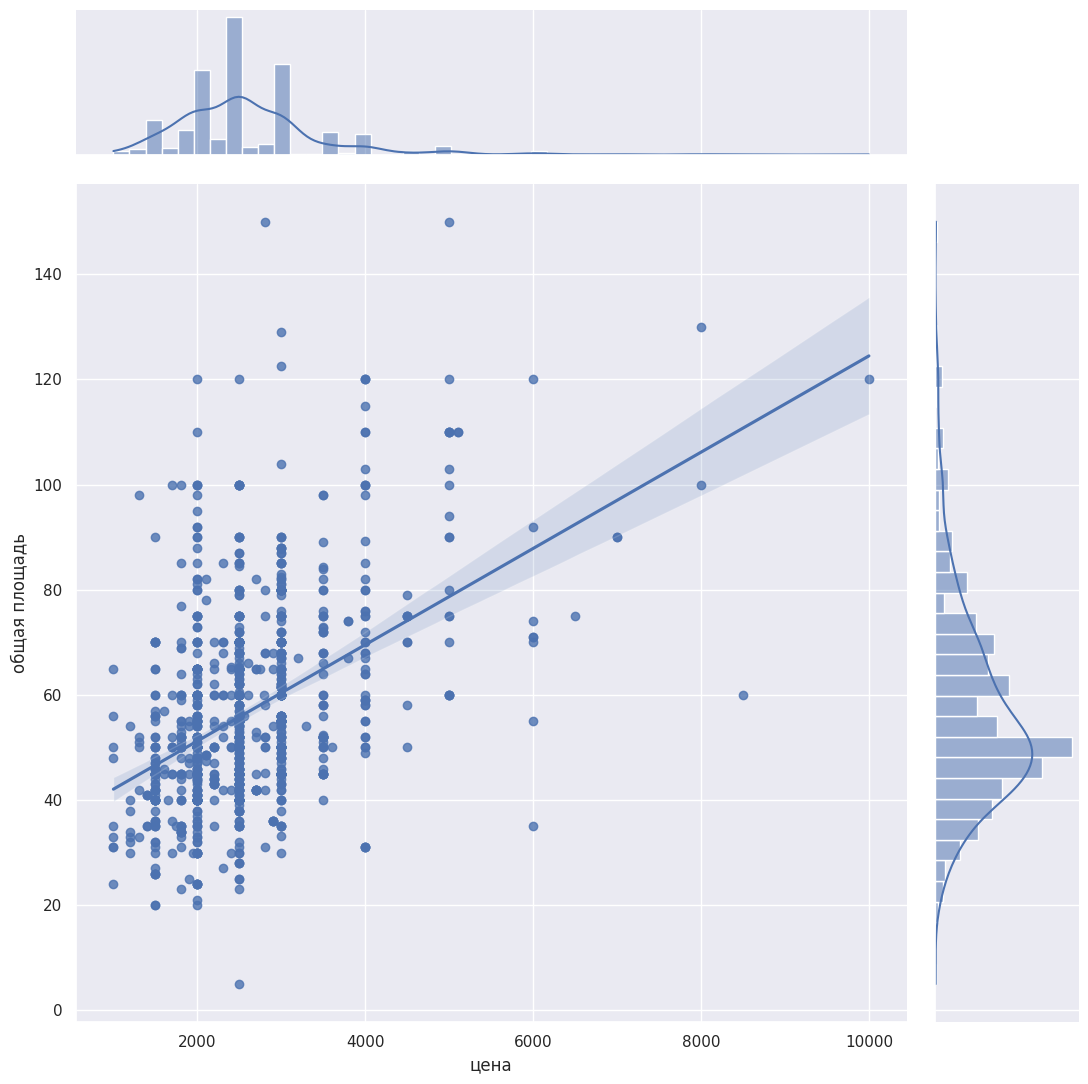

In [ ]:
sns.set(rc = {'figure.figsize':(18,7)})

sns.jointplot(x="цена", y="общая площадь", data=df, kind="reg", height = 11, palette=("Spectral"));


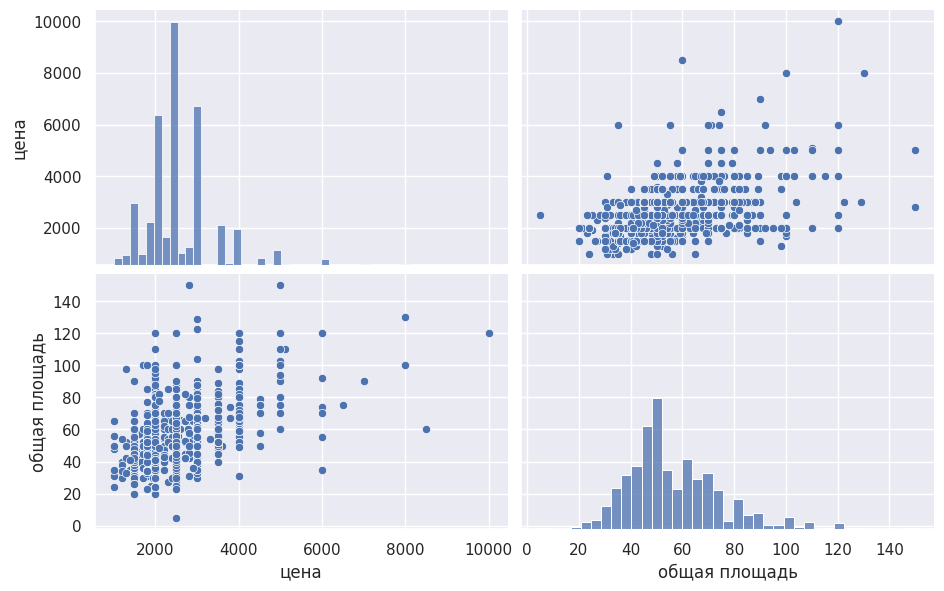

In [ ]:
sns.set(rc = {'figure.figsize':(18,20)})

sns_plot = sns.pairplot(df[['цена', 'общая площадь']], height=3, aspect=1.6)


### Посмотрим как попарно соотносятся друг с другом самые важные признаки из датасета с помощью такой штуки из сиборна.

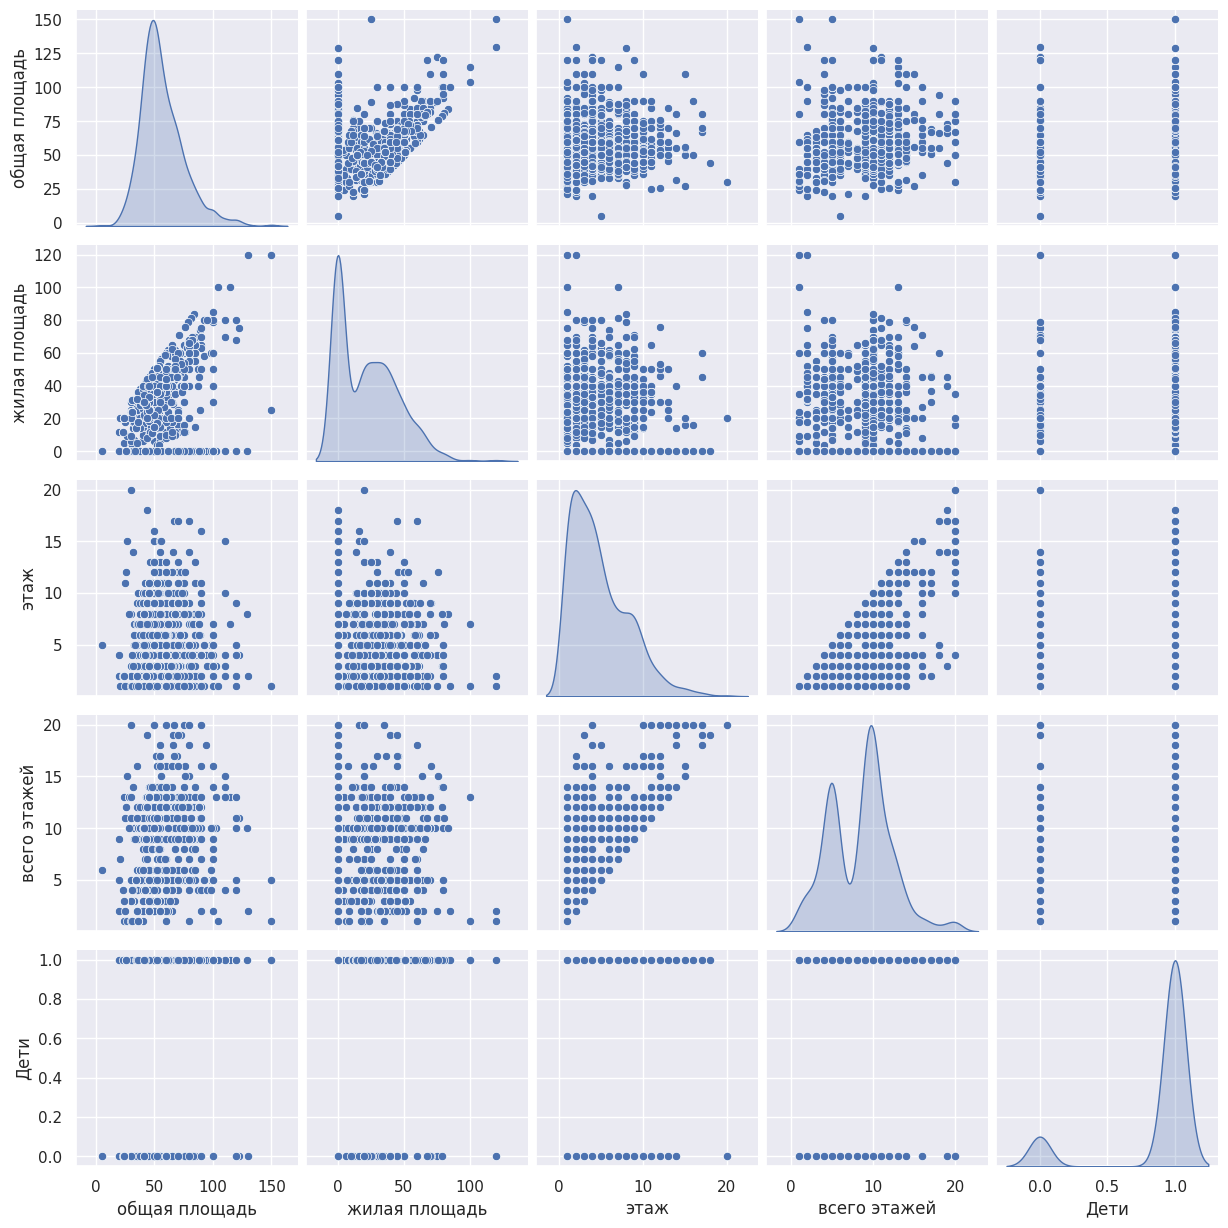

In [ ]:
sns.set(rc = {'figure.figsize':(18,7)})

sns.pairplot(df.iloc[:,1:7],diag_kind = "kde",kind = "scatter",palette = "Spectral");


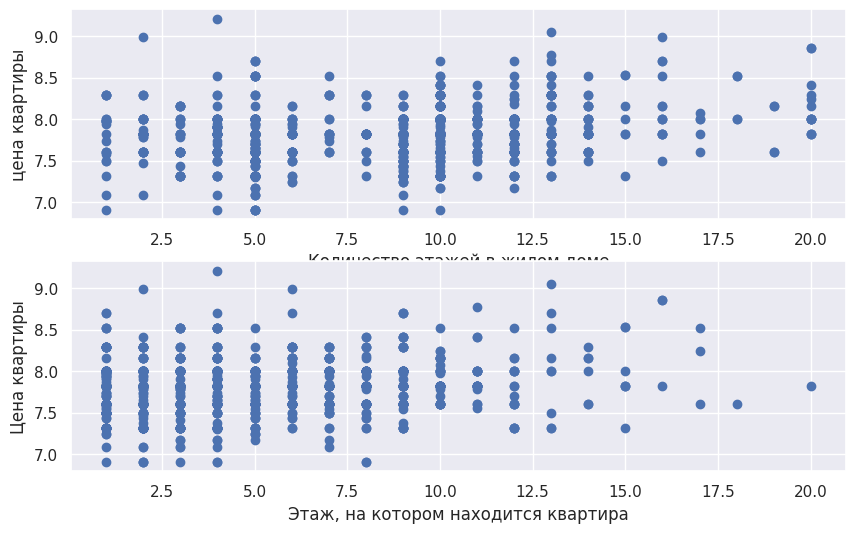

In [100]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = df['всего этажей'], y = df['цена'])
ax[0].set_xlabel("Количество этажей в жилом доме")
ax[0].set_ylabel("цена квартиры")

ax[1].scatter(x = df['этаж'], y = df['цена'])
ax[1].set_xlabel("Этаж, на котором находится квартира")
ax[1].set_ylabel("Цена квартиры")
plt.savefig("этажи3.png")

plt.show()

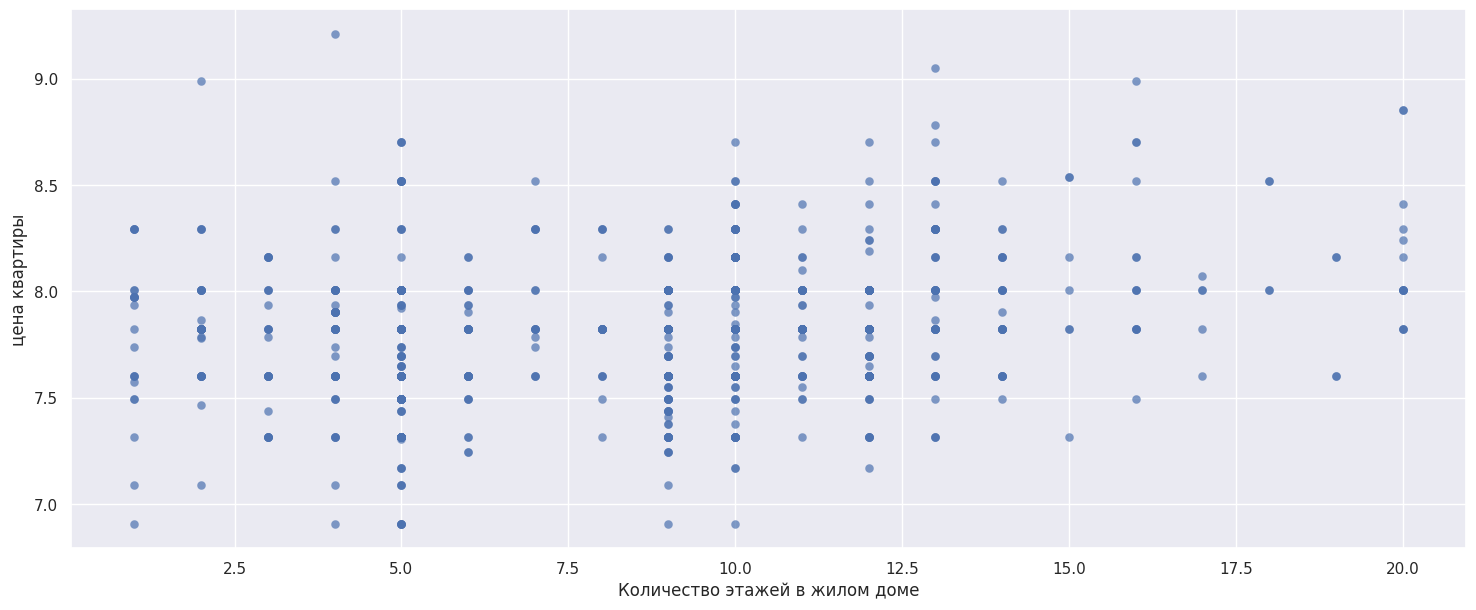

In [102]:
plt.scatter(x = df['всего этажей'], y = df['цена'], linewidths = 0.1, alpha = 0.7)
plt.xlabel("Количество этажей в жилом доме")
plt.ylabel("цена квартиры")
plt.savefig("цена-этажи.png")

Text(0.5, 1.0, 'Возможность заселения с детьми')

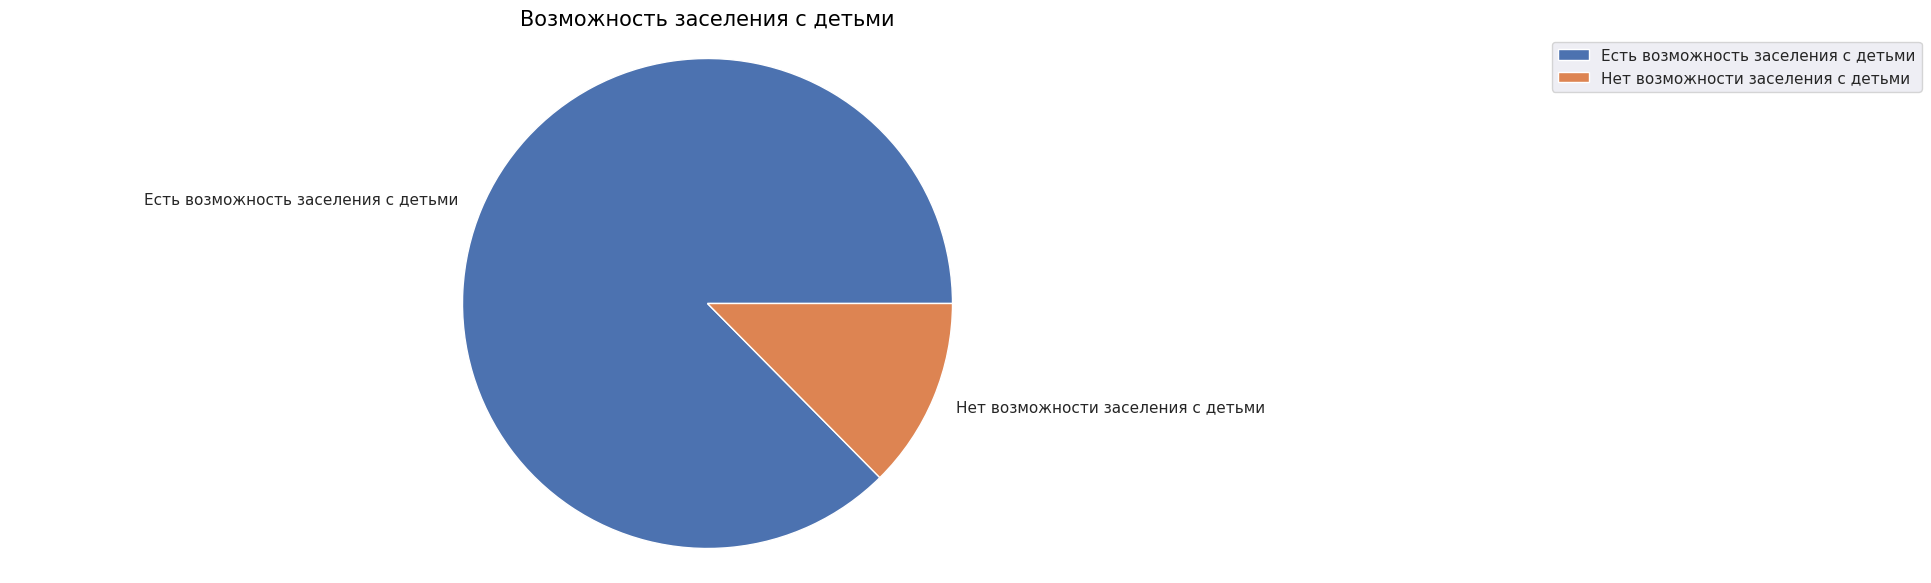

In [104]:
children = df['Дети'].value_counts().to_frame().reset_index(drop=False)
children.columns=['Дети','count']
fig, ax = plt.subplots()
labels = ['Есть возможность заселения с детьми', 'Нет возможности заселения с детьми']
ax.pie(children['count'], labels=labels,  radius = 15000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("Возможность заселения с детьми", fontsize=15, color="black")

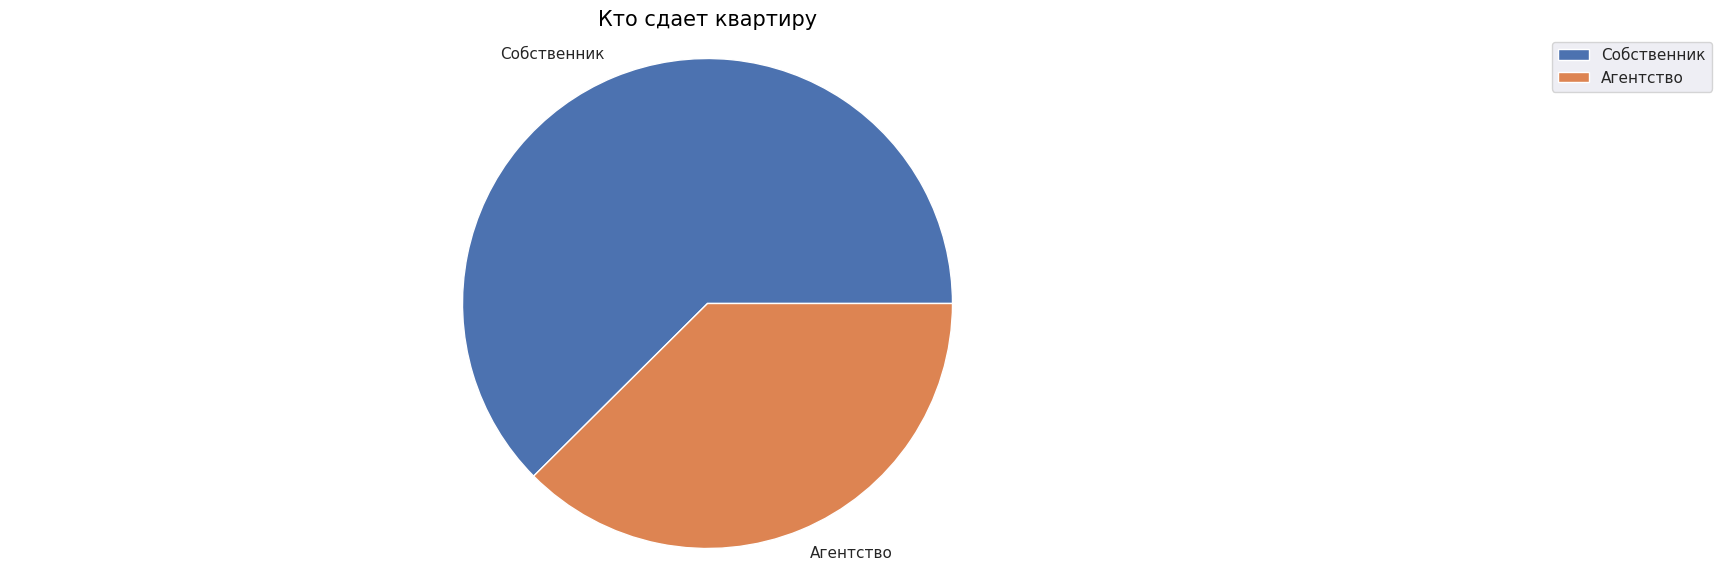

In [105]:
agent = df['агенство'].value_counts().to_frame().reset_index(drop=False)
agent.columns=['агенство','count']
fig, ax = plt.subplots()
labels = ['Собственник', 'Агентство']
ax.pie(agent['count'], labels=labels,  radius = 15000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("Кто сдает квартиру", fontsize=15, color="black")
plt.savefig('Кто сдает квартиру.png');

### Посчитаем распределение квартир по этажам.

In [ ]:
floor = df['этаж'].value_counts().to_frame().reset_index(drop=False) #посчитаем распределение квартир по этажам из выборки
floor.columns=['этаж','count']


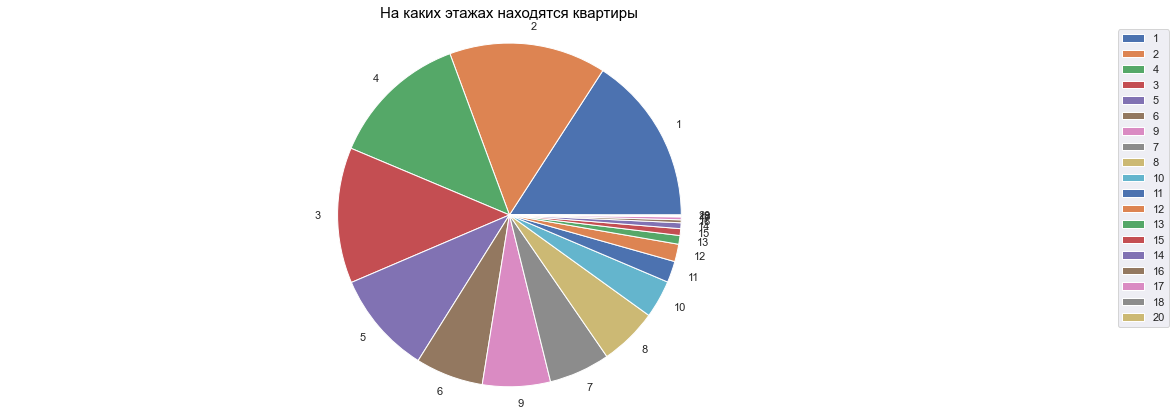

In [ ]:
#да, немножко налепилось, но куда более увеличивать масштаб(
fig, ax = plt.subplots()

ax.pie(floor['count'], labels=floor.этаж,  radius = 15000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("На каких этажах находятся квартиры", fontsize=15, color="black");

## Теперь посмотрим распределение квартир по улицам города.

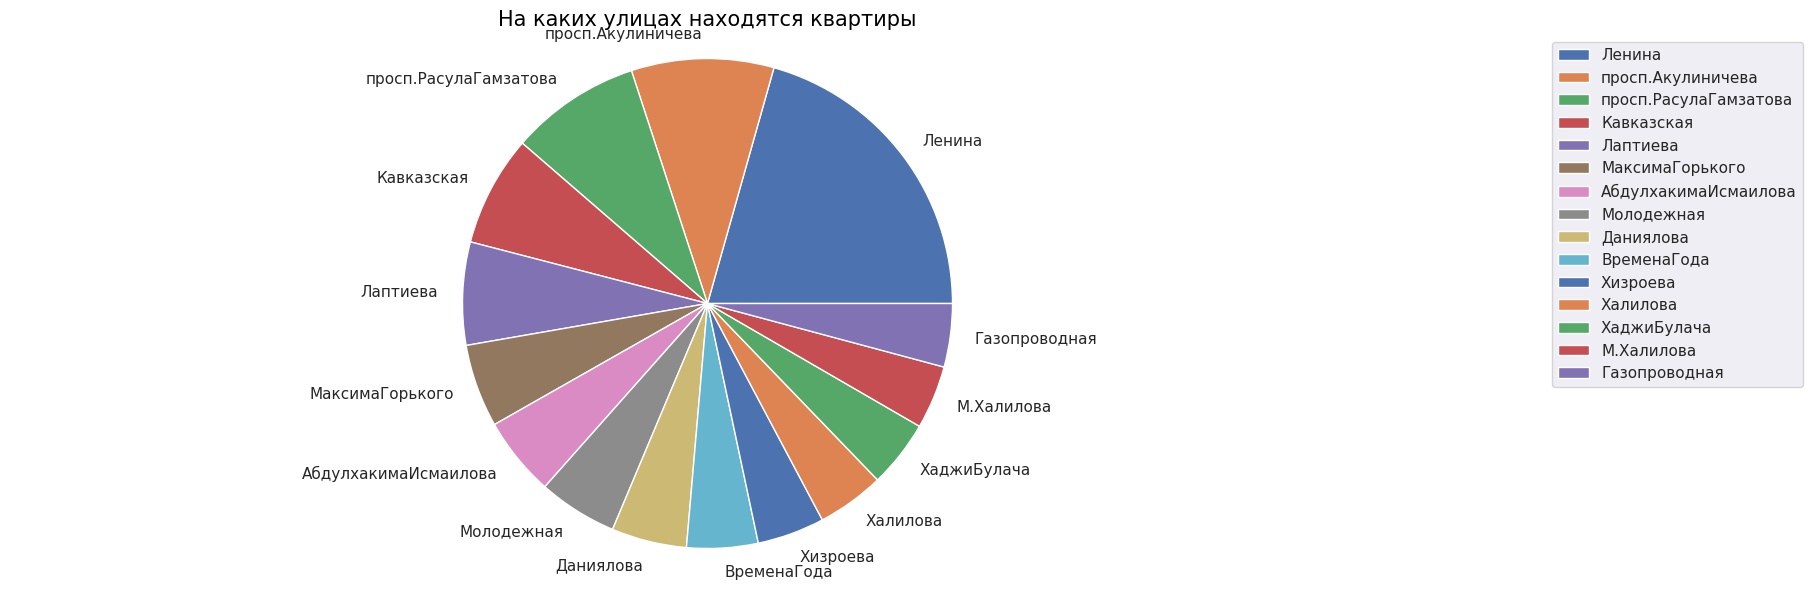

In [ ]:
fig, ax = plt.subplots()
ax.pie((streets['count']), labels=streets.улица,  radius = 1000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("На каких улицах находятся квартиры", fontsize=15, color="black");

Больше всего квартир сдаются на улице Ленина.

### Ну и напоследок - распределение по районам города.

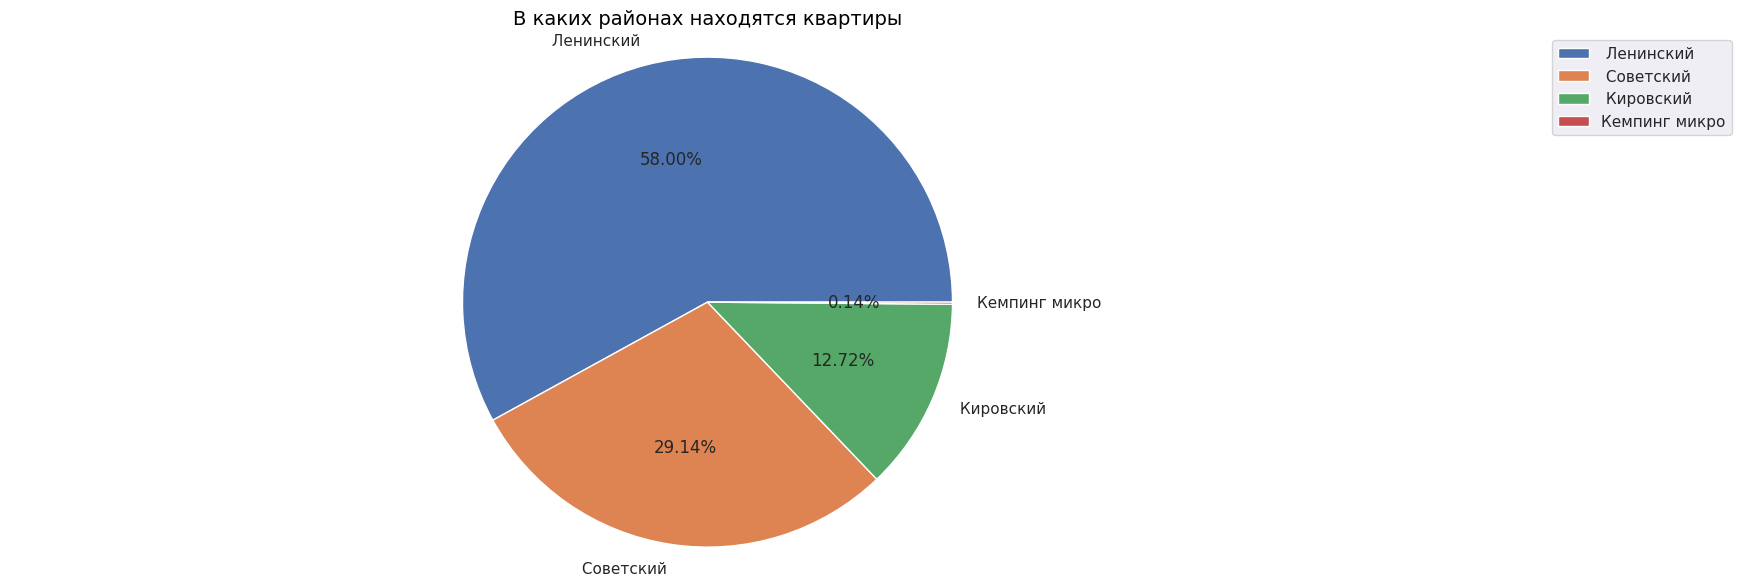

In [ ]:
fig, ax = plt.subplots()
ax.pie((districts['count']), labels=districts.район, autopct='%1.2f%%')
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("В каких районах находятся квартиры", fontsize=14, color="black");

Самый популярный район для сдачи квартир - Ленинский. На втором месте - Советский, на 3 - Кировский.

# **Создание новых признаков**

## Квартиры рядом с морем

Проанализировали улицы из датасета и ототбрали те, которые находятся в пешей доступности от моря (посмотрели в Яндекс картах). Создадим важную переменную

In [ ]:
by_the_sea = ["просп.Акулиничева","просп. РасулаГамзатова","Лаптиева", "МаксимаГорького", "Даниялова", "ВременаГода", "ХаджиБулача", "Халилова", "М.Халилова", "Орджоникидзе", "Гапцахская", "Гапцахская","Советская","Габитова","Магарамкентская", "Заморская","Заморская"]
list_by_the_sea = [0]*len(df)
prices_by_the_sea = []
prices_not_by_the_sea = []
for i in range(len(df)):
  for k in range(len(by_the_sea)):
    if df["улица"].iloc[i] == by_the_sea[k]:
      list_by_the_sea[i] = 1
      prices_by_the_sea.append(df.iloc[i][1])
  if list_by_the_sea[i] ==0:
    prices_not_by_the_sea.append(df.iloc[i][1])
df['рядом с морем'] = list_by_the_sea
df['рядом с морем'].value_counts()

0    848
1    249
Name: рядом с морем, dtype: int64

Удалили колонку с улицами.
## Теперь датасет выглядит так!

In [ ]:
df.drop('улица', axis= 1 , inplace= True )

In [ ]:
prices=df.цена.apply(lambda x: np.log(x))
df['агенство'] = df['агенство'].replace('Собственник',1).astype(int)
df.цена=prices


,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,рядом с морем
0,8.006368,1,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,0
1,7.600902,1,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,7.824046,1,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,0
3,7.244228,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,0
4,8.160518,1,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,8.006034,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,1
1095,7.824046,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,1
1096,7.901007,1,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,0
1097,7.313220,1,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,0


In [ ]:
df.drop('район', axis= 1 , inplace= True )

In [ ]:
df

,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,рядом с морем
0,8.006368,1,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0
1,7.600902,1,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0
2,7.824046,1,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0
3,7.244228,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0
4,8.160518,1,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,8.006034,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,1
1095,7.824046,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,1
1096,7.901007,1,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0
1097,7.313220,1,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0


In [ ]:
df.to_excel(r'C:\Users\murad\OneDrive\Рабочий стол\mydata.xlsx', index=False)

In [ ]:
df #на данном этапе мы переехали в R, так как оказалось, что удобнее пользоваться stargazer, а не питоновскими функциями)

,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,рядом с морем
0,3000,1,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,0
1,2000,1,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,2500,1,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,0
3,1400,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,0
4,3500,1,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2999,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,1
1095,2500,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,1
1096,2700,1,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,0
1097,1500,1,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,0


# **ГИПОТЕЗЫ**
## **Первая гипотеза:**
Используем новый признак.  


H0: средняя цена за съем квартиры на первом этаже равна, цене за съем квартиры, которые находятся выше

H1: средняя цена за съем квартиры на первом этаже не равна, чем цена за съем квартиры, которые находятся выше


$$
\begin{aligned}
& H_0: \mu_{на первом} = \mu_{выше} \\
& H_1: \mu_{на первом} \neq \mu_{выше}
\end{aligned}
$$






In [79]:
import scipy.stats as stats
import pandas as pd
from statsmodels. stats.weightstats import ztest, ttest_ind
alpha = 0.05
#все гипотезы проверяются на уровне значимости = 0.05

In [91]:
sample1=df[df['этаж']==1].цена
sample2=df[df['этаж']!=2].цена
t_stat, p_value = stats.ttest_ind(sample1, sample2)
t_stat, p_value #отклоняем нулевую гипотезу, средняя цена квартир на первом этаже не равняется средней цене за съем квартир, которые находятся выше

(-2.0043572283233337, 0.04527502938739347)

## **Вторая гипотеза:**
Используем новый признак.  


H0: средняя цена за квартиры, которые находятся рядом с морем, равняется средней цене за квартиры, которые находятся не в шаговой доступности от моря

H1: средняя цена за квартиры, которые находятся рядом с морем, больше средней цены за квартиры, которые находятся не в шаговой доступности от моря

$$
\begin{aligned}
& H_0: \mu_{рядом} = \mu_{далеко} \\
& H_1: \mu_{рядом} > \mu_{далеко}
\end{aligned}
$$


In [99]:
prices_by_the_sea = df[df['рядом с морем']==1].цена
prices_not_by_the_sea = df[df['рядом с морем']==0].цена
diff = (prices_by_the_sea).mean() - (prices_not_by_the_sea).mean()
diff_std = np.sqrt(prices_by_the_sea.var(ddof=1)/len(prices_by_the_sea) + prices_not_by_the_sea.var(ddof=1)/len(prices_not_by_the_sea))
z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)
if (z_crit > z_obs).any:
    print(f"Нулевая гипотеза отвергается, так как расчетное значение {z_obs}  больше критического.")
else:
    print('Нулевая гипотеза не отвергается')


Нулевая гипотеза отвергается, так как расчетное значение 4.347498149612645  больше критического.


А значит средняя цена по квартирам, находящихся рядом с морем выше средней цены по квартирам, находящихся не рядом с морем.

## Третья гипотеза:

H0: Средняя цена квартир, куда можно с детьми, равна средней цене за квартиры, куда нельзя с детьми.
$$
\begin{aligned}
& H_0: \mu_{дети} =  \mu_{без} \\
& H_1: \mu_{дети} >  \mu_{без}
\end{aligned}
$$

In [93]:
x = df[df.Дети == 1].цена.values
y = df[df.Дети == 0].цена.values

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)

print(f'{z_obs:.3} не попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза отвергается')

5.43 не попадает в (-1.64 , 1.64) => Нулевая гипотеза отвергается
